In [64]:
import mcstasscript as ms
my_configurator = ms.Configurator()
my_configurator.set_mcrun_path("/usr/bin/")
my_configurator.set_mcstas_path("/usr/share/mcstas/3.4/")

In [65]:
instrument = ms.McStas_instr("my_instrument")
L0=2.165
DL=0.02
By=4.68e-3
AnaSign=1

In [66]:
instrument.available_components()

Here are the available component categories:
 contrib
 misc
 monitors
 obsolete
 optics
 samples
 sources
 union
Call available_components(category_name) to display


In [67]:
source = instrument.add_component("source", "Source_simple")
source.show_parameters()

 ___ Help Source_simple _____________________________________________________________
|optional parameter|required parameter|default value|user specified value|
radius = 0.1 [m] // Radius of circle in (x,y,0) plane where neutrons are 
                    generated. 
yheight = 0.0 [m] // Height of rectangle in (x,y,0) plane where neutrons are 
                     generated. 
xwidth = 0.0 [m] // Width of rectangle in (x,y,0) plane where neutrons are 
                    generated. 
dist = 0.0 [m] // Distance to target along z axis.
focus_xw = 0.045 [m] // Width of target
focus_yh = 0.12 [m] // Height of target
E0 = 0.0 [meV] // Mean energy of neutrons.
dE = 0.0 [meV] // Energy half spread of neutrons (flat or gaussian sigma).
lambda0 = 0.0 [AA] // Mean wavelength of neutrons.
dlambda = 0.0 [AA] // Wavelength half spread of neutrons.
flux = 1.0 [1/(s*cm**2*st*energy unit)] // flux per energy unit, Angs or meV if 
                                           flux=0, the source emits 1 in 4*

In [68]:
source.yheight = 0.01
source.xwidth = 0.01
source.dist = 5
source.focus_xw = 0.01
source.focus_yh = 0.01
source.lambda0 = 2.165
source.dlambda = 2.2
gauss=1
print(source)

COMPONENT source = Source_simple(
  yheight = 0.01, // [m]
  xwidth = 0.01, // [m]
  dist = 5, // [m]
  focus_xw = 0.01, // [m]
  focus_yh = 0.01, // [m]
  lambda0 = 2.165, // [AA]
  dlambda = 2.2 // [AA]
)
AT (0, 0, 0) ABSOLUTE


In [69]:
wavelength = instrument.add_parameter("wavelength", value=L0, comment="Wavelength in AA")
delta_wavelength = instrument.add_parameter("delta_wavelength", value=DL, comment="Stdev of Wavelength in AA")
By = instrument.add_parameter("By", value=By, comment="Flipper field strength in Y direction (?)")

source.lambda0 = wavelength
source.dlambda = delta_wavelength
print(source)

COMPONENT source = Source_simple(
  yheight = 0.01, // [m]
  xwidth = 0.01, // [m]
  dist = 5, // [m]
  focus_xw = 0.01, // [m]
  focus_yh = 0.01, // [m]
  lambda0 = wavelength, // [AA]
  dlambda = delta_wavelength // [AA]
)
AT (0, 0, 0) ABSOLUTE


In [70]:
set_pol = instrument.add_component("set_pol", "Set_pol")
set_pol.set_parameters(px=1)
set_pol.set_AT(0.01, RELATIVE=source)

In [71]:
f1 = instrument.add_component("f1","Foil_flipper_magnet")
f1.set_parameters(
    xwidth=0.1, 
    yheight=0.1, 
    zdepth=0.3, 
    phi=0.095993, 
    foilthick=3.0, 
    Bx=0, 
    By=By, 
    Bz=0, 
    foil_in=1, verbose=0
)
f1.set_AT(1.0, RELATIVE=source)

In [72]:
f2 = instrument.copy_component("f1")
f2.set_AT(3.0, RELATIVE=source)
# Todo: remove this, make it unnecessary
By=4.68e-3

f2.set_parameters(By=2 * By)


In [73]:
ana = instrument.add_component("ana","PolAnalyser_ideal")
ana.set_parameters(mx=AnaSign)
ana.set_AT(0.18, RELATIVE=f2)


In [74]:
sans_spheres = instrument.add_component("sans_sample", "SANS_spheres2")

In [75]:
sans_spheres.set_AT(0.2, RELATIVE=f2)
sans_spheres.set_parameters(xwidth=0.02, 
    yheight=0.02, 
	zthick=0.001, 
	dsdw_inc=0.0, 
	sc_aim=0.8, 
	sans_aim=0.95, 
	R=10000, 
	phi=0.015, 
	singlesp=0,
	Qmind = 0.00003,
	Qmaxd = 0.001)
print(sans_spheres)


COMPONENT sans_sample = SANS_spheres2(
  xwidth = 0.02, // [m]
  yheight = 0.02, // [m]
  zthick = 0.001, // [m]
  dsdw_inc = 0.0, // [cm^-1]
  sc_aim = 0.8, // [1]
  sans_aim = 0.95, // [1]
  R = 10000, // [AA]
  phi = 0.015, // [1]
  singlesp = 0, // [1]
  Qmind = 3e-05, // [AA^-1]
  Qmaxd = 0.001 // [AA^-1]
)
AT (0, 0, 0.2) RELATIVE f2


In [76]:
PSD = instrument.add_component("PSD", "PSD_monitor")
PSD.set_AT([0, 0, 5], RELATIVE=source)
PSD.set_parameters(xwidth=0.011, yheight=0.011 ,ny=1001, nx=1, filename='"PSD.dat"')

In [77]:
instrument.show_parameters()

 wavelength        = 2.165    // Wavelength in AA
 delta_wavelength  = 0.02     // Stdev of Wavelength in AA
 By                = 0.00468  // Flipper field strength in Y direction (?)


In [78]:
instrument.settings(ncount=2E6)

In [79]:
data = instrument.backengine()


/usr/share/mcstas/3.4/tools/Python/mcrun/mcrun.py:450: SyntaxWarning: invalid escape sequence '\w'
  params = re.findall('[\w0-9]+=[^=\s]+', text)
/usr/share/mcstas/3.4/tools/Python/mcrun/mccode.py:328: SyntaxWarning: invalid escape sequence '\ '
  ''' Escape \ and " '''
INFO: Using directory: "/home/tbvanderwoude/repos/bep/my_instrument_2"
INFO: Regenerating c-file: my_instrument.c
Info:    'Foil_flipper_magnet' is a contributed component.
CFLAGS=

-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:

-----------------------------------------------------------
INFO: Recompiling: ./my_instrument.out
./my_instrument.c: In function ‘Table_Read_Handle’:
./my_instrument.c:7220:60: warning: format ‘%i’ expects argument of type ‘int’, but argument 5 has type ‘long int’ [-Wformat=]
 7220 |       fprintf(stderr,"Warning: Read_Tab

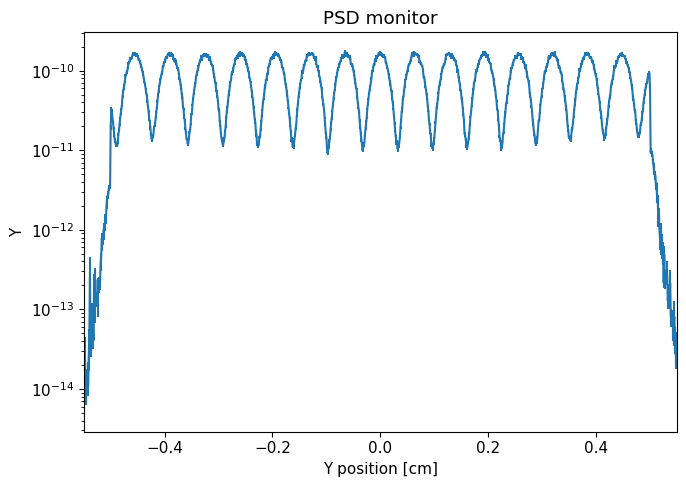

In [80]:
ms.make_sub_plot(data, log=True)


In [67]:
print(data)

[
McStasData: PSD type: 1D  I:0.0 E:0.0 N:0.0]


In [16]:
PSD_data = ms.name_search("PSD", data)

In [17]:
PSD_data.Intensity

array([[6.69146064e-43, 9.45734871e-43, 1.16077369e-42, ...,
        1.03128032e-42, 8.93673226e-43, 1.12721570e-42],
       [7.45804085e-43, 9.30261196e-43, 1.01681651e-42, ...,
        8.25143307e-43, 1.06341673e-42, 9.15675151e-43],
       [1.04999558e-42, 8.52702776e-43, 7.39040587e-43, ...,
        7.30570589e-43, 7.80860885e-43, 1.02413356e-42],
       ...,
       [1.04611355e-42, 9.39218117e-43, 8.57910854e-43, ...,
        1.14305509e-42, 8.85209419e-43, 7.84277083e-43],
       [9.58152972e-43, 8.75139007e-43, 7.64416319e-43, ...,
        8.10727546e-43, 1.07541984e-42, 9.14928792e-43],
       [8.33334213e-43, 8.00607007e-43, 1.11378994e-42, ...,
        7.92938323e-43, 8.71366325e-43, 9.19261177e-43]])

In [18]:
intensity_xy = PSD_data.Intensity

In [19]:
info_dict = PSD_data.metadata.info
for field, info in info_dict.items():
    print(field, ":", info)

Date : Thu Apr 25 17:09:13 2024 (1714057753)
type : array_2d(90, 90)
Source : my_instrument (my_instrument.instr)
component : PSD
position : 0 0 10
title : PSD monitor
Ncount : 2000000
filename : PSD.dat
statistics : X0=-0.00690479; dX=3.32107; Y0=-0.0361954; dY=3.31192;
signal : Min=3.43788e-43; Max=2.08437e-38; Mean=3.43101e-40;
values : 2.77912e-36 2.71422e-38 1.99996e+06
xvar : X
yvar : Y
xlabel : X position [cm]
ylabel : Y position [cm]
zvar : I
zlabel : Signal per bin
xylimits : -25 25 -25 25
variables : I I_err N
Parameters : {'wavelength': 5.0}
